In [3]:
#Loading some libraries
%matplotlib inline
#%matplotlib ipympl
%load_ext autoreload
%autoreload 2
from pylab import *
import numpy as np
import pandas as pd
import glob
import pandas as pd
def smooth(ser, sc):
    return np.array(pd.Series(ser).rolling(sc, min_periods=1, center=True).mean())
import pomegranate
from pomegranate import GeneralMixtureModel,NormalDistribution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
observed_data = ["../data/meg3/speed_data/DQ_v3_S288CrDNA_meg3RDP34_speed.tsv"]

observed_data = ["../data/meg3/SMU100_speed_dY_meg3_RDP33.tsv"]
observed_data = ["../data/meg3/SMU100_speed_meg3_RDP40.tsv","../data/meg3/SMUall_speed_meg3_RDP40.tsv"]
observed_data = ["../data/meg3/dataSMU100_meg3_RDP42d_speed_position_RT.tsv"]
observed_data=["../data/meg3/dataSMU100PLS_nt_20211025_speed_position_RTsc3.tsv"]
#observed_data=glob.glob("../data/HU/*.tsv")
rdp_on_uniform = "../meg3_mock/Meg3_multi_v10fullrange_combined_RDPv34.tsv"
#rdp_on_uniform = ["../meg3_mock/read_multi1_0_PLS.tsv","../meg3_mock/read_multi1_1_PLS.tsv","../meg3_mock/read_multi1_2_PLS.tsv"]
rdp_on_uniform = ["../data/meg3/read_multi1_v2_PLS.tsv"]
theoretical_speeds = "../meg3_mock/multi_full_range_combined_parameters.txt"

theoretical_speeds = ["../meg3_mock/multi_res1_beter_calibration_0_parameters.txt","../meg3_mock/multi_res1_beter_calibration_1_parameters.txt",
                     "../meg3_mock/multi_res1_beter_calibration_2_parameters.txt"]
theoretical_speeds = None
rdp_on_uniform = ["../data/meg3/read_multi1_uni_round3_PLS.tsv"]
rdp_speed="spedd.rdp"
resolution_th_speed=100
n_component_final=3
n_average=5
delta=200 # in bp/min to model p(true_speed|rdp_speed) #Overallaping but large enought for fitting distribution to be correct
maxv=7000

In [7]:
exp_list={}
for data in observed_data:
    file_d = pd.read_csv(data,sep="\t")
    #print(len(file_d))
    #file_d=file_d[file_d.filterS==False]
    #print(len(file_d))
    exp_list[data[:-4]]=file_d
pd.read_csv(data,sep="\t")

    
print(exp_list.keys())


dict_keys(['../data/meg3/dataSMU100PLS_nt_20211025_speed_position_RTsc3'])


In [3]:
if type(rdp_on_uniform) == str: 
    rdp = pd.read_csv(rdp_on_uniform,sep="\t")
else:
    rdp  = pd.concat([pd.read_csv(rdp_on_uniformi,sep="\t") for rdp_on_uniformi in rdp_on_uniform])
    rdp[rdp_speed]=rdp["speed"]
    rdp["true_speed"]=rdp["speed0"]
rdp

,read_id,speed,speed0,spedd.rdp,true_speed
0,9c1b6aa0-9f3c-418f-8c5f-72c9954e5468,788,406.7,788,406.7
1,9c1b6aa0-9f3c-418f-8c5f-72c9954e5468,736,406.7,736,406.7
2,6601e065-fcfe-4daa-84d5-bec8e8a39c1e,5016,4330.6,5016,4330.6
3,107f28a6-247e-4d41-bbea-4d5c55b06678,4938,4960.1,4938,4960.1
4,c1600ee3-68df-48bb-8a64-9fafbc49d97c,1258,1471.6,1258,1471.6
...,...,...,...,...,...
53862,1b7948e1-5713-41d2-9676-8d20d5f2b3ff,701,736.3,701,736.3
53863,a8419bd0-e250-43a4-97f6-28f70f6da07e,2862,2448.8,2862,2448.8
53864,13182f80-86df-4d8f-95cb-705b32a61505,1238,1017.3,1238,1017.3
53865,dfe9c8a7-ffbd-481f-b159-38d29e0cb721,911,953.3,911,953.3


In [30]:
speeds_ori=[]
for f in [f"../meg3_mock/multi_res1_beter_calibration_{i}_all_speeds.txt" for i in range(3)]:
    with open(f,"r") as fich:
        for l in fich.readlines()[1::2]:
            l=l.strip()
            if l != "":        
                speeds_ori.extend(list(map(float,l.split())))

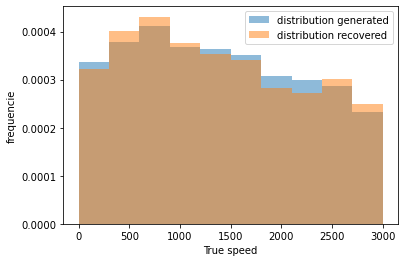

In [44]:
density=True
end=3000
hist(speeds_ori,range=[0,end],density=density,alpha=0.5,label="distribution generated")
hist(rdp["true_speed"],range=[0,end],density=density,alpha=0.5,label="distribution recovered")
legend()
xlabel("True speed")
if density:
    ylabel("frequencie")
else:
    ylabel("#")

In [4]:
import ast
true_speed ={}
if theoretical_speeds != None:
    if type(theoretical_speeds) == str:
        theoretical_speeds=[theoretical_speeds]
    for sub in theoretical_speeds:
        with open(sub,"r") as f:
            for l in f.readlines():
                key , *dictp = l.split(" ")
                dictp= ast.literal_eval(" ".join(dictp))
                #(key,dictp["speed_th"])
                true_speed[key]=dictp["speed_th"]
           # break
    combined = rdp
    combined["true_speed_2"] =[true_speed[idd] for idd in rdp["read_id"] ]
    combined
else:
    combined=rdp

In [ ]:
hist(true_speed.values())

(0.0, 4500.0)

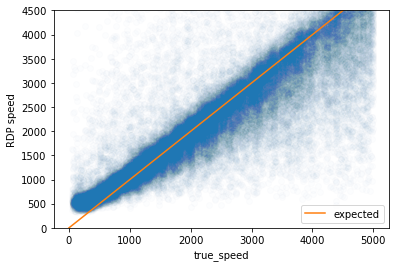

In [82]:
plot(combined["true_speed"],combined[rdp_speed],"o",alpha=0.01)
r=np.arange(0,5000,100)
plot(r,r,label="expected")
xlabel("true_speed")
ylabel("RDP speed")
legend()
ylim(0,4500)

../data/meg3/dataSMU100PLS_nt_20211025_speed_position_RTsc3 123191


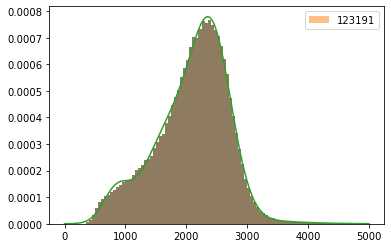

In [8]:


for expn,exp in exp_list.items():
    figure()

    print(expn,len(exp))
    hist(exp.speed,bins=100,range=[0,5000],density=True);
    nc=5
    if len(exp)<100:
        nc=2

    init = GeneralMixtureModel.from_samples(NormalDistribution, n_components=nc,
                                    X=np.array(exp.speed)[:,np.newaxis],
                                            n_jobs=6)
    hist(exp.speed,bins=100,range=[0,5000],density=True,label=f"{len(exp.speed)}",alpha=0.5);
    r=np.arange(0,5000)
    plot(r,init.probability(r[:,np.newaxis]))
    legend()

In [9]:
from pomegranate import GeneralMixtureModel,NormalDistribution
class frozenGeneralMixtureModel(GeneralMixtureModel):
    def __init__(self, gm):
        super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
                                                   weights=np.exp(gm.weights))
    def from_summaries(self,*args,**kwargs):
        return self
    


5 100
5 200
5 300
5 400
5 500
5 600
5 700
5 800
5 900
5 1000
5 1100
5 1200
5 1300
5 1400
5 1500
5 1600
5 1700
5 1800
5 1900
5 2000
5 2100
5 2200
5 2300
5 2400
5 2500
5 2600
5 2700
5 2800
5 2900
5 3000
5 3100
5 3200
5 3300
5 3400
5 3500
5 3600
5 3700
5 3800
5 3900
5 4000
5 4100
5 4200
5 4300
5 4400
../data/meg3/dataSMU100PLS_nt_20211025_speed_position_RTsc3
5 100
5 200
5 300
5 400
5 500
5 600
5 700
5 800
5 900
5 1000
5 1100
5 1200
5 1300
5 1400
5 1500
5 1600
5 1700
5 1800
5 1900
5 2000
5 2100
5 2200
5 2300
5 2400
5 2500
5 2600
5 2700
5 2800
5 2900
5 3000
5 3100
5 3200
5 3300
5 3400
5 3500
5 3600
5 3700
5 3800
5 3900
5 4000
5 4100
5 4200
5 4300
5 4400
../data/meg3/dataSMU100PLS_nt_20211025_speed_position_RTsc3
5 100
5 200
5 300
5 400
5 500
5 600
5 700
5 800
5 900
5 1000
5 1100
5 1200
5 1300
5 1400
5 1500
5 1600
5 1700
5 1800
5 1900
5 2000
5 2100
5 2200
5 2300
5 2400
5 2500
5 2600
5 2700
5 2800
5 2900
5 3000
5 3100
5 3200
5 3300
5 3400
5 3500
5 3600
5 3700
5 3800
5 3900
5 4000
5 4100
5 42

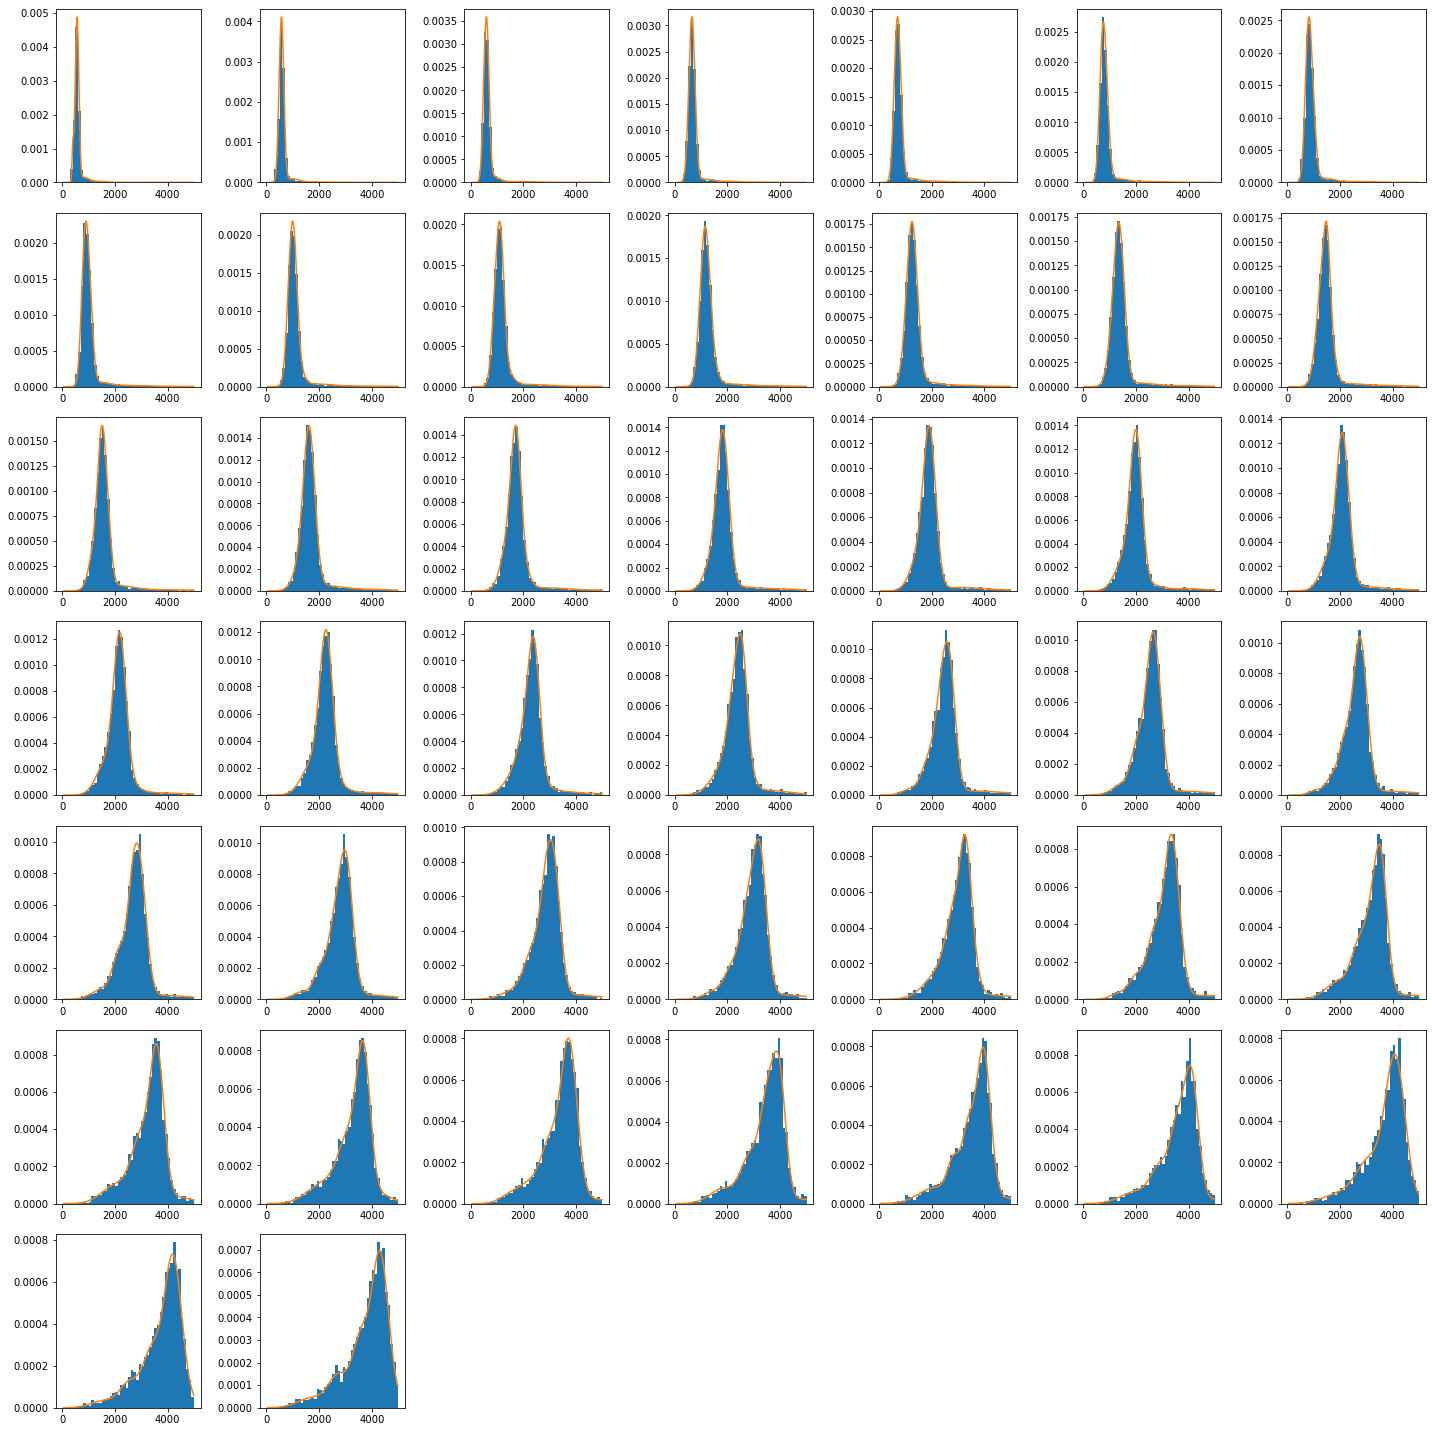

In [84]:
weights_lists={expn:[] for expn in exp_list.keys()}
tofit50 = {expn:[] for expn in exp_list.keys()}
#hist(rdp_final,range=[0,5000],bins=100,density=True,label="drawed rdp");
#figure()
centers = list(range(100,4500,resolution_th_speed))
show_dist=True
maxi_test=10000
r=list(range(50,5000,10))
if show_dist:
    f=figure(figsize=(20,20))
for average in range(n_average):
    #print(average)
    probas = {}
    for ic,center in enumerate(centers):
        #print(center)
        sample=combined[:][rdp_speed][ (combined[:]["true_speed"]<center+delta) & \
                                               (combined[:]["true_speed"]>center-delta) & \
                                               (combined[:][rdp_speed]<maxv) ]
        
        #print(len(sample))
        startc=5
        n_try=0
        total_try=0
        while (center not in probas) or (np.any(np.isnan(probas[center].probability(r)))): # or np.any(probas[center].probability(r)>0.02) : #last one to avoid weird fit
            probas[center] = frozenGeneralMixtureModel(GeneralMixtureModel.from_samples(NormalDistribution, 
                                                                                        n_components=startc,
                                        X=np.array(sample)[:,np.newaxis],
                                                n_jobs=1))
            n_try+=1
            if n_try==100:
                startc+=1
                n_try=0
            if startc==10:
                startc=5
                n_try=0
            total_try +=1
            if total_try> 2000:
                print("Not working")
                figure()
                hist(np.array(sample)[:,np.newaxis],range=[0,6000],bins=100)
                raise
        print(startc,center)
                                            
        if show_dist and average==0:
            n=int(len(centers)**.5)+1
            f.add_subplot(n,n,ic+1)
            hist(np.array(sample),density=True,range=[0,5000],bins=50)
            plot(r,probas[center].probability(r))
            #yticks([])
        

    for expn in exp_list.keys():
        print(expn)
        nt= len(exp_list[expn])
        sub=np.random.choice(range(nt),size=nt//4,replace=False)
        sub = np.array(range(nt))
        tofit50[expn]=GeneralMixtureModel([probas[center] for center in centers])
        tofit50[expn].fit(np.array(exp_list[expn].speed)[sub,np.newaxis],n_jobs=3);

        weights=np.exp(tofit50[expn].weights)
        weights_lists[expn].append(weights)
if show_dist:
    f.tight_layout()

In [66]:
tofit50[expn].fit

<function GeneralMixtureModel.fit>

In [ ]:
tofit50[expn].fit

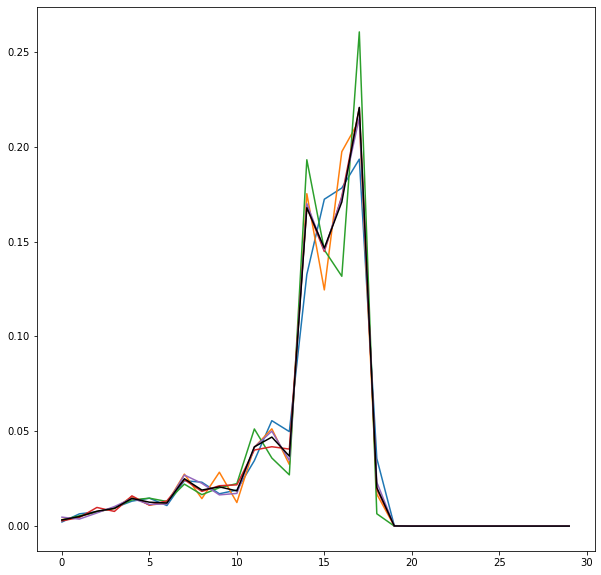

In [70]:
figure(figsize=(10,10))
plot(np.array(weights_list).T)
plot(np.nanmean(weights_list,axis=0),"k")

../data/meg3/dataSMU100PLS_nt_20211025_speed_position_RTsc3_distribution_round2.json
0.6272839339019806 [2486.967307248759, 148.4961267797938]
0.25056977419441706 [2004.1625580479165, 298.5108349396259]
0.12214629190360243 [979.1767113056023, 421.28688353619754]


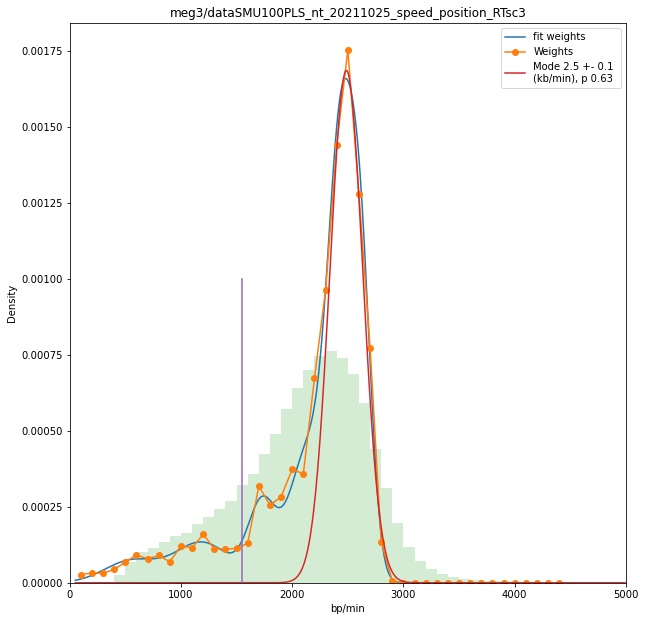

In [85]:
import pickle
fig=figure(figsize=(25,25))
i=1
extra="round2"
"""
sub_ordered=['../data/HU/BT16_0HU_RDPv27speed',
              '../data/HU/BT16_1MMHU_RDPv27speed',
             '../data/HU/BT16_2.5MMHU_RDPv27speed',
             '../data/HU/BT16_5MMHU_RDPv27speed',
      '../data/HU/BT16_10MMHU_RDPv27speed',
         '../data/HU/BT16_25MMHU_RDPv27speed',
              '../data/HU/BT2_50HU_refS288Cr_RDPv27speed',
             '../data/HU/BT2_100HU_refS288Cr_RDPv27speed',
     '../data/HU/BT2_200HU_refS288Cr_RDPv27speed']

sub_w = {k:weights_lists[k] for k in sub_ordered}
"""
for expn,weights_list in weights_lists.items():
    fig.add_subplot(3,3,i)
    i+=1
    #titleu =expn
    title(expn.replace("../data/",""))
    proba = []
    while proba ==[] or np.any(np.isnan(final.probability(centers))):
        proba=True
        pnow=[np.nan]
        while  np.any(np.isnan(pnow)):
            drawed_th=np.random.choice(centers,size=10000,p=np.nanmean(weights_list,axis=0))

            final6=GeneralMixtureModel.from_samples(NormalDistribution, n_components=6,
                                            X=np.array(drawed_th)[:,np.newaxis],inertia=0.5);
            pnow=final6.probability(r)
            name_dist = expn+f"_distribution_{extra}.json"
            with open(name_dist,"w") as f:
                print(name_dist)
                f.write(final6.to_json())
                #pickle.dump(final6.to_dict(),f)
            #final
            final=GeneralMixtureModel.from_samples(NormalDistribution, n_components=n_component_final,
                                            X=np.array(drawed_th)[:,np.newaxis]);
        #final2=NormalDistribution.from_samples(np.array(drawed_th)[:,np.newaxis]);
    #plot(r,final.probability(r),label="deconv (fit weights)")
    plot(r,final6.probability(r),label="fit weights")
    #print(final6.probability(r))
    plot(centers,np.nanmean(weights_list,axis=0)/resolution_th_speed,"-o",label="Weights")
    #plot(r,tofit50[expn].probability(r),label="observed")
    hist(exp_list[expn].speed,bins=50,range=[0,5000],density=True,alpha=0.2);

    xlabel("bp/min")
    ylabel("Density")
    weights_parameters=list(zip(np.exp(final.weights),final.to_dict()["distributions"]))
    weights_parameters.sort()
    for w,d in weights_parameters[::-1]:
        print(w,d["parameters"])
    mode_weight,mode_param=weights_parameters[-1]
    mode_param = mode_param["parameters"]
    plot(r,NormalDistribution(*mode_param).probability(r)*mode_weight,
         label=f"Mode {mode_param[0]/1000:.1f} +- {mode_param[1]/1000:.1f} \n(kb/min), p {mode_weight:.2f}")
    
    legend()
    xlim(0,5000)
plot([1550,1550],[0,0.001])
fig.tight_layout()

In [14]:
disti=GeneralMixtureModel.from_json("../data/meg3/dataSMU100PLS_nt_20211025_speed_position_RTsc3_distribution_round2.json")
final=GeneralMixtureModel.from_samples(NormalDistribution, n_components=n_component_final,
                                            X=np.array(disti.sample(10000))[:,np.newaxis])

0.6480420358860868 [2481.729011478587, 153.3794505235449]
0.23763970084060645 [1963.5740490605401, 289.34997421726655]
0.11431826327330671 [918.1893647010459, 395.63764317891025]


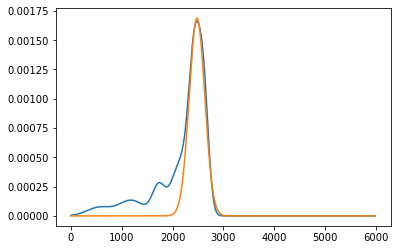

In [19]:
r=np.arange(0,6000,10)
plot(r,disti.probability(r),label="fit weights")
weights_parameters=list(zip(np.exp(final.weights),final.to_dict()["distributions"]))
weights_parameters.sort()
for w,d in weights_parameters[::-1]:
    print(w,d["parameters"])
mode_weight,mode_param=weights_parameters[-1]
mode_param = mode_param["parameters"]
normal=NormalDistribution(*mode_param).probability(r)*mode_weight
plot(r,normal,
     label=f"Mode {mode_param[0]/1000:.1f} +- {mode_param[1]/1000:.1f} \n(kb/min), p {mode_weight:.2f}")
pd.DataFrame({"Speed":r,
              "Fit of weights":disti.probability(r),
             "Mode fit with three gaussians":normal}).to_csv("fig3.tsv",sep="\t",index=False)

../data/meg3/dataSMU100PLS_nt_20211025_speed_position_RTsc3_distribution_round2.json
0.6654087211165641 [2370.9865233185574, 223.61946197083918]
0.3345912788834358 [1571.424370319966, 616.8473043595637]


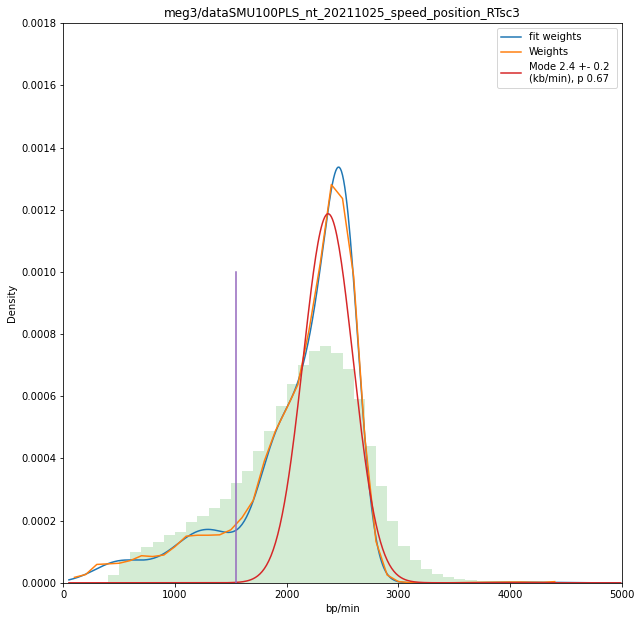

In [27]:
import pickle
fig=figure(figsize=(25,25))
i=1
extra="round2"
"""
sub_ordered=['../data/HU/BT16_0HU_RDPv27speed',
              '../data/HU/BT16_1MMHU_RDPv27speed',
             '../data/HU/BT16_2.5MMHU_RDPv27speed',
             '../data/HU/BT16_5MMHU_RDPv27speed',
      '../data/HU/BT16_10MMHU_RDPv27speed',
         '../data/HU/BT16_25MMHU_RDPv27speed',
              '../data/HU/BT2_50HU_refS288Cr_RDPv27speed',
             '../data/HU/BT2_100HU_refS288Cr_RDPv27speed',
     '../data/HU/BT2_200HU_refS288Cr_RDPv27speed']

sub_w = {k:weights_lists[k] for k in sub_ordered}
"""
for expn,weights_list in weights_lists.items():
    fig.add_subplot(3,3,i)
    i+=1
    #titleu =expn
    title(expn.replace("../data/",""))
    proba = []
    while proba ==[] or np.any(np.isnan(final.probability(centers))):
        proba=True
        pnow=[np.nan]
        while  np.any(np.isnan(pnow)):
            drawed_th=np.random.choice(centers,size=10000,p=np.nanmean(weights_list,axis=0))

            final6=GeneralMixtureModel.from_samples(NormalDistribution, n_components=6,
                                            X=np.array(drawed_th)[:,np.newaxis],inertia=0.5);
            pnow=final6.probability(r)
            name_dist = expn+f"_distribution_{extra}.json"
            with open(name_dist,"w") as f:
                print(name_dist)
                f.write(final6.to_json())
                #pickle.dump(final6.to_dict(),f)
            #final
            final=GeneralMixtureModel.from_samples(NormalDistribution, n_components=2,#n_component_final,
                                            X=np.array(drawed_th)[:,np.newaxis]);
        #final2=NormalDistribution.from_samples(np.array(drawed_th)[:,np.newaxis]);
    #plot(r,final.probability(r),label="deconv (fit weights)")
    plot(r,final6.probability(r),label="fit weights")
    #print(final6.probability(r))
    plot(centers,np.nanmean(weights_list,axis=0)/resolution_th_speed,label="Weights")
    #plot(r,tofit50[expn].probability(r),label="observed")
    hist(exp_list[expn].speed,bins=50,range=[0,5000],density=True,alpha=0.2);

    xlabel("bp/min")
    ylabel("Density")
    weights_parameters=list(zip(np.exp(final.weights),final.to_dict()["distributions"]))
    weights_parameters.sort()
    for w,d in weights_parameters[::-1]:
        print(w,d["parameters"])
    mode_weight,mode_param=weights_parameters[-1]
    mode_param = mode_param["parameters"]
    plot(r,NormalDistribution(*mode_param).probability(r)*mode_weight,
         label=f"Mode {mode_param[0]/1000:.1f} +- {mode_param[1]/1000:.1f} \n(kb/min), p {mode_weight:.2f}")
    
    legend()
    xlim(0,5000)
    ylim(0,0.0018)
plot([1550,1550],[0,0.001])
fig.tight_layout()

In [28]:
w0=tofit50[expn].weights.copy()
print(w0)

[ -4.91643293  -7.13088919  -6.01306578  -5.02008876  -4.52220113
  -4.48744655  -4.64169027  -4.64113386  -4.79249095  -4.64216143
  -4.34751855  -4.37655282  -4.73249686  -4.84021611  -4.98148697
  -4.93602226  -4.68954049  -4.41613957  -4.1035948   -3.46435638
  -2.87483294  -2.45836485  -2.05769739  -1.71074762  -1.7405255
  -2.3546876   -3.01626658  -4.21058479  -5.19216903  -6.71179796
  -6.56093628  -8.09444465 -11.35863665 -13.5041575  -14.30659592
 -14.70376372 -17.55784947 -10.10524197  -9.75609891 -15.47590262
 -10.40009038 -15.45553506 -10.77609072  -5.33115629]


In [29]:
tofit50[expn].weights=np.log(np.nanmean(weights_list,axis=0))

array([ -4.88105369,  -7.79988922,  -6.05672548,  -4.95744814,
        -4.50090222,  -4.53689553,  -4.62270046,  -4.63291092,
        -4.72871489,  -4.78008163,  -4.36879613,  -4.42848795,
        -4.6973284 ,  -4.78448169,  -4.83442732,  -4.86947281,
        -4.68245696,  -4.47275212,  -4.12890754,  -3.398118  ,
        -2.90762294,  -2.49445678,  -2.07293841,  -1.66052603,
        -1.76683402,  -2.32601623,  -3.08412244,  -4.21343717,
        -5.25539003,  -6.86015346,  -6.08178767,  -7.39093351,
       -11.82421192, -13.6515698 , -14.15112821, -14.0650248 ,
       -17.45736258, -11.21736634,  -9.65326396, -15.66018598,
       -10.8720822 , -12.50387179, -10.73589302,  -5.36077305])

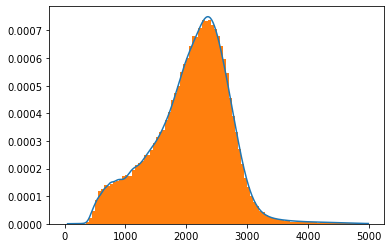

In [31]:
plot(r,tofit50[expn].probability(r))
hist(exp.speed,bins=100,range=[0,5000],density=True);
tofit50[expn].weights

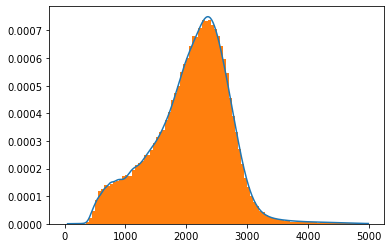

In [49]:
len(exp_list[expn].speed[exp_list[expn].speed>1550])/len(exp_list[expn].speed)

0.8091969432899853

In [23]:
[k for k in weights_lists.keys() if ("BT16" in k or "00HU" in k)]

['../data/HU/BT16_5MMHU_RDPv27speed',
 '../data/HU/BT2_50HU_refS288Cr_RDPv27speed',
 '../data/HU/BT16_2.5MMHU_RDPv27speed',
 '../data/HU/BT16_1MMHU_RDPv27speed',
 '../data/HU/FS_RDPv27speed',
 '../data/HU/JP3A_refS288Cr_RDPv27speed',
 '../data/HU/BT1_refS288Cr_RDPv27speed',
 '../data/HU/BT16_10MMHU_RDPv27speed',
 '../data/HU/BT12_BT1_RDPv27speed',
 '../data/HU/FR_RDPv27speed',
 '../data/HU/BT16_0HU_RDPv27speed',
 '../data/HU/BT15_BT1_RDPv27speed',
 '../data/HU/FU_RDPv27speed',
 '../data/HU/BT13_BT1_RDPv27speed',
 '../data/HU/FT_RDPv27speed',
 '../data/HU/BT16_25MMHU_RDPv27speed',
 '../data/HU/BT2_0HU_refS288Cr_RDPv27speed',
 '../data/HU/BT2_200HU_refS288Cr_RDPv27speed',
 '../data/HU/EW_refS288Cr_RDPv27speed',
 '../data/HU/BT2_100HU_refS288Cr_RDPv27speed',
 '../data/HU/BT2_25HU_refS288Cr_RDPv27speed',
 '../data/HU/FV_RDPv27speed',
 '../data/HU/DQ_refS288Cr_RDPv27speed',
 '../data/HU/BT14_BT1_RDPv27speed',
 '../data/HU/FK_refS288Cr_RDPv27speed',
 '../data/HU/BT10_100UM_RDPv27speed']

In [ ]:
raise

0.5342537942124993


array([0.94716028, 0.05283972])

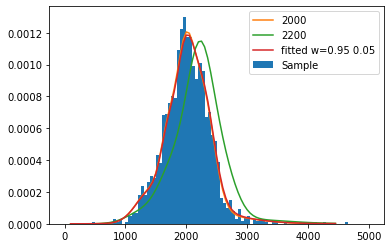

In [46]:
sample = probas[2000].sample(2000)
hist(sample,range=[0,5000],bins=100,density=True,label="Sample")
mixture = GeneralMixtureModel([probas[2000],probas[2200]])
f=mixture.fit(sample,return_history=True)
print(f[1])
plot(centers,probas[2000].probability(centers),label="2000")
plot(centers,probas[2200].probability(centers),label="2200")
w=np.exp(mixture.weights)
plot(centers,mixture.probability(centers),label=f"fitted w={w[0]:.2f} {w[1]:.2f}")
p2000 = probas[2000].probability(sample)
p2200 = probas[2200].probability(sample)
legend()
w=[p2/(p2+p22) for p2,p22 in zip(p2000,p2200)]
print(np.mean(w))
np.exp(mixture.weights)

In [38]:
f[1].log_probabilities

[-14792.161200067358,
 -14786.435221191781,
 -14781.341450309237,
 -14776.831469917586,
 -14772.852343800092,
 -14769.350133267055,
 -14766.27236595189,
 -14763.569626852228,
 -14761.196465920964,
 -14759.111805640532,
 -14757.279004001184,
 -14755.665695202826,
 -14754.243499013559,
 -14752.987663127089,
 -14751.876681917614,
 -14750.891919344087,
 -14750.01725255955,
 -14749.238745074641,
 -14748.544353223486,
 -14747.923666445937,
 -14747.367679970273,
 -14746.868597424002,
 -14746.419660417967,
 -14746.01500202459,
 -14745.649521162413,
 -14745.318775108402,
 -14745.018887626098,
 -14744.746470481588,
 -14744.49855639807,
 -14744.272541762462,
 -14744.06613763068,
 -14743.877327792135,
 -14743.704332835407,
 -14743.54557931618,
 -14743.399673265716,
 -14743.265377394484,
 -14743.141591443358,
 -14743.027335220904,
 -14742.921733933405,
 -14742.824005477194]

In [ ]:
plot(r,tofit.probability(r))
hist(exp.speed,bins=100,range=[0,5000],density=True);

In [ ]:
non_flat = GeneralMixtureModel.from_samples(NormalDistribution, n_components=8,
                                X=np.array(combined["spedd.rdp"])[:,np.newaxis],
                                        n_jobs=6)
hist(combined["spedd.rdp"],bins=100,range=[0,5000],density=True);
r=np.arange(0,5000)
plot(r,non_flat.probability(r[:,np.newaxis]))

In [ ]:
def draw_sample_according_to_dataset(original_sample,
                                    experimental_distribution,non_flat):
    
    # 1) fit distribution by multigaussian probably best

    rdp_speed=np.array([ori[0] for ori in original_sample])
    p = experimental_distribution.probability(rdp_speed[:,np.newaxis])
    ip = non_flat.probability(rdp_speed[:,np.newaxis])
    p/=ip
    p/=np.sum(p)
    rangex=np.arange(len(rdp_speed))
    new_distribution = np.random.choice(rangex,size=50000,p=p)
    deconvoluted = [original_sample[i][1] for i in new_distribution]
    drawed = [original_sample[i][0] for i in new_distribution]
    return deconvoluted, drawed
    #for exp in experimental_sample
u = 5000*np.random.uniform(size=10000)
ziped=list(zip(combined["spedd.rdp"],
                              combined["true_speed"]))
deconvoluted,drawed=draw_sample_according_to_dataset(ziped,init,non_flat)
print(len(deconvoluted))
hist(drawed,range=[0,6000],bins=100);
hist(deconvoluted,range=[0,6000],bins=100);

In [ ]:
def forward_draw(original_sample,speed_sample,sample_size=50000,delta=100):
    drawed=[]
    rdp_final=[]
    true_speed=np.array([ori[1] for ori in original_sample])
    rangex=np.arange(len(true_speed))
    if type(speed_sample)!=list:
        speed_sample = speed_sample.sample(sample_size)
    for sample in speed_sample:
        selected=(true_speed>sample-delta) & (true_speed<sample+delta)
        #print(np.sum(selected)
        if np.any(selected):
            which = np.random.choice(rangex[selected])
            drawed.append(original_sample[which][1])
            rdp_final.append(original_sample[which][0])

    return rdp_final, drawed
param=(-35.794751355749284, 2708.9600966905327, 494.3110214146591)
skew = stats.skewnorm(*param)

rdp_final,drawed=forward_draw(list(zip(combined["spedd.rdp"],
                              combined["true_speed"])),list(skew.rvs(40000)))

In [ ]:
list(zip(combined["spedd.rdp"],
                              combined["true_speed"]))[-3:]

In [ ]:
combined[["spedd.rdp","true_speed"]][-3:]

In [ ]:
r=np.arange(0,5000,100)
ran_skew = skew.pdf(r)
plot(r,ran_skew)
hist(drawed,range=[0,5000],bins=100,density=True);
plot([2700,2700],[0,0.007],label="True")

figure()
hist(rdp_final,range=[0,5000],bins=100,density=True,label="drawed rdp");
r=np.arange(0,5000)
plot(r,init.probability(r[:,np.newaxis]),label="Observed rdp")
legend()

In [ ]:
delta=100
#hist(rdp_final,range=[0,5000],bins=100,density=True,label="drawed rdp");
figure()
centers = list(range(100,4500,50))
probas = {}
r=list(range(0,5000,100))
for center in centers:
    sample=combined["spedd.rdp"][ (combined["true_speed"]<center+delta) & (combined["true_speed"]>center-delta) ]
    #hist(sample,range=[0,5000],bins=100,density=True);
    #init = GeneralMixtureModel.from_samples(NormalDistribution, n_components=6,
    #                                X=np.array(sample)[:,np.newaxis],
    #                                        n_jobs=1)
    #print(init.probability(r))
    #plot(init.probability(r))
    while center not in probas or np.any(np.isnan(probas[center].probability(r))):
        probas[center] = frozenGeneralMixtureModel(GeneralMixtureModel.from_samples(NormalDistribution, n_components=6,
                                    X=np.array(sample)[:,np.newaxis],
                                            n_jobs=1))
    #print(center)
    #if np.any(np.isnan(probas[center].probability(r))):
    #    hist(sample,range=[0,5000],bins=100,density=True);
    #    print(center)
    #    raise

In [ ]:
tofit50 = GeneralMixtureModel([probas[center] for center in centers])
tofit50.fit(np.array(exp.speed)[:,np.newaxis]);

In [ ]:
r=list(range(0,5000,10))
plot(r,tofit.probability(r))
hist(exp.speed,bins=100,range=[0,5000],density=True);
figure()
plot(list(range(100,4500,100)),np.exp(tofit.weights)/100,label="Deconvoluted100")
plot(list(range(100,4500,50)),np.exp(tofit50.weights)/50,label="Deconvoluted50")

param=(-35.794751355749284, 2708.9600966905327, 494.3110214146591)
skew = stats.skewnorm(*param).pdf(r)
normalf=stats.norm(loc=2500,scale=150).pdf(r)+0.35*stats.norm(loc=2000,scale=600).pdf(r)
plot(r,skew,label="skew")
plot(r,normalf/max(normalf)*0.0022,label="GM")

xlabel("bp/min")
legend()

In [ ]:
drawed_th=np.random.choice(list(range(100,4500,50)),size=10000,p=np.exp(tofit50.weights))
final=GeneralMixtureModel.from_samples(NormalDistribution, n_components=6,
                                    X=np.array(drawed_th)[:,np.newaxis]);
plot(r,final.probability(r),label="deconvolved")
plot(r,tofit.probability(r),label="observed")
legend()
xlabel("bp/min")
ylabel("Density")

In [ ]:
hist(drawed_th,bins=100,range=[0,5000],density=True);
plot(r,final.probability(r))
final.probability(r);
#print(final)

In [ ]:
final.to_dict()

In [ ]:
param=(-35.794751355749284, 2708.9600966905327, 494.3110214146591)
skew = stats.skewnorm(*param)
skew.rvs(10)

In [ ]:
def draw_sample_according_to_dataset(original_sample,
                                     experimental_distribution,
                                     delta=100):
    
    #print(original_sample)
    # 1) fit distribution by multigaussian probably best
    drawed=[]
    deconvoluted=[]
    rdp_speed=np.array([ori[0] for ori in original_sample])
    rangex=np.arange(len(rdp_speed))
    for sample in experimental_distribution:
        selected=(rdp_speed>sample-delta) & (rdp_speed<sample+delta)
        #print(np.sum(selected)
        if np.any(selected):
            which = np.random.choice(rangex[selected])
            drawed.append(original_sample[which][0])
            deconvoluted.append(original_sample[which][1])

    return deconvoluted, drawed

deconvoluted2,drawed=draw_sample_according_to_dataset(list(zip(combined["spedd.rdp"],
                              combined["true_speed"])),deconvoluted)

In [ ]:
hist(deconvoluted2,range=[0,6000],bins=100,density=True);
r=np.arange(0,5000)
plot(r,init.probability(r[:,np.newaxis]),label="Original")

In [ ]:
def draw_sample_according_to_dataset(original_sample,
                                     experimental_distribution,
                                     delta=100):
    
    #print(original_sample)
    # 1) fit distribution by multigaussian probably best
    drawed=[]
    deconvoluted=[]
    rdp_speed=np.array([ori[0] for ori in original_sample])
    rangex=np.arange(len(rdp_speed))
    for sample in experimental_distribution:
        selected=(rdp_speed>sample-delta) & (rdp_speed<sample+delta)
        #print(np.sum(selected)
        if np.any(selected):
            which = np.random.choice(rangex[selected])
            drawed.append(original_sample[which][0])
            weights.append(1/np.sum(selected))

            deconvoluted.append(original_sample[which][1])

    return deconvoluted, drawed
"""
def draw_sample_according_to_dataset(original_sample,
                                     init,
                                     delta=100):
    
    #print(original_sample)
    # 1) fit distribution by multigaussian probably best
    drawed=[]
    deconvoluted=[]
    weights=[]
    rdp_speed=np.array([ori[0] for ori in original_sample])
    rangex=np.arange(len(rdp_speed))
    range_speed=np.arange(100,5000,100)
    probas =init.probability(range_speed[:,np.newaxis])
    for selected_speed,proba in zip(range_speed,probas):
        selected=(rdp_speed>selected_speed-delta) & (rdp_speed<selected_speed+delta)
        #print(np.sum(selected)
        #if np.any(selected):
        #which = np.random.choice(rangex[selected])
        for  which in rangex[selected]:
            drawed.append(original_sample[which][0])
            weights.append(1/np.sum(selected) * proba)

            deconvoluted.append(original_sample[which][1])

    return deconvoluted, drawed,weights
"""
    #for exp in experimental_sample
sub = combined["spedd.rdp"]==2700
deconvoluted,drawed,weights=draw_sample_according_to_dataset(list(zip(combined["spedd.rdp"],
                              combined["true_speed"])),init)
print(len(drawed))

In [ ]:
weights;

In [ ]:
#hist(drawed,bins=100,range=[0,5000],density=True,alpha=0.7);
r=np.arange(0,5000)
plot(r,init.probability(r[:,np.newaxis]),label="Original")
hist(deconvoluted,bins=100,range=[0,6000],
     density=True,alpha=0.7,label="Deconvoluted",weights=weights);
param=(-35.794751355749284, 2708.9600966905327, 494.3110214146591)
skew = stats.skewnorm(*param).pdf(r)
plot(skew,label="Best so far")
plot([2500,2500],[0,0.002])
legend()